In [1]:
!nvidia-smi
!pip install diffusers transformers accelerate torch lpips pillow torchvision --quiet

zsh:1: command not found: nvidia-smi
^C
ERROR: Operation cancelled by user


In [3]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import lpips
import torchvision.transforms as T
import numpy as np
from google.colab import files


In [4]:
uploaded = files.upload()  # upload your suspect image
seed_path = list(uploaded.keys())[0]
seed_path


Saving glass-of-wine.jpg to glass-of-wine.jpg


'glass-of-wine.jpg'

In [5]:
loss_fn = lpips.LPIPS(net='vgg').to("cuda")

to_tensor = T.Compose([
    T.Resize((256,256)),
    T.ToTensor()
])

def lpips_dist(img1, img2):
    t1 = to_tensor(img1).unsqueeze(0).to("cuda")
    t2 = to_tensor(img2).unsqueeze(0).to("cuda")
    d = loss_fn(t1, t2)
    return d.item()


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:06<00:00, 84.5MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/vgg.pth


In [6]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


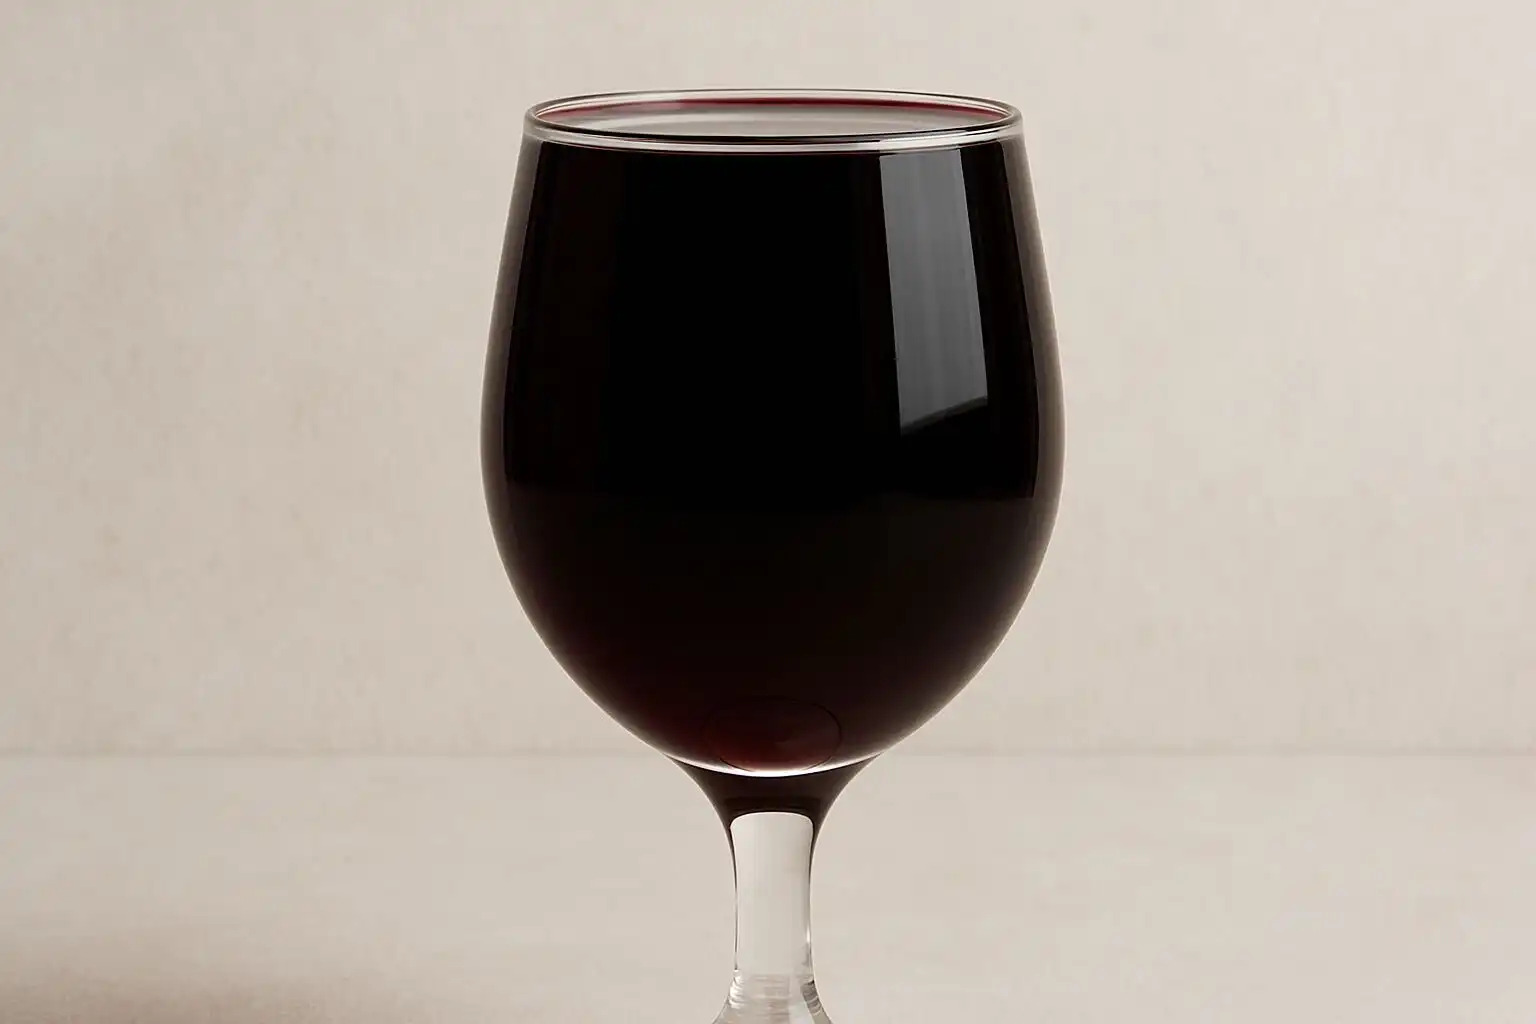

In [7]:
seed = Image.open(seed_path).convert("RGB")

caption = "a glass bottle of wine filled to the brim"   # change this to match your image
seed


In [8]:
strengths = [0.02, 0.2, 0.4, 0.6, 0.8, 1.0]
num_samples = 4

all_outputs = {s: [] for s in strengths}

for s in strengths:
    print(f"Generating for strength = {s}")
    for _ in range(num_samples):
        img = pipe(
            prompt=caption,
            image=seed,
            strength=s,
            guidance_scale=7.5,
            num_inference_steps=50
        ).images[0]
        all_outputs[s].append(img)


Generating for strength = 0.02


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Generating for strength = 0.2


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Generating for strength = 0.4


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Generating for strength = 0.6


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Generating for strength = 0.8


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating for strength = 1.0


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
feature_vector = []

for s in strengths:
    print(f"Computing LPIPS at strength = {s}")
    dists = [lpips_dist(seed, img) for img in all_outputs[s]]
    feature_vector.append(min(dists))

print("\nFeature vector:", feature_vector)


Computing LPIPS at strength = 0.02
Computing LPIPS at strength = 0.2
Computing LPIPS at strength = 0.4
Computing LPIPS at strength = 0.6
Computing LPIPS at strength = 0.8
Computing LPIPS at strength = 1.0

Feature vector: [0.03773997351527214, 0.0715467557311058, 0.19348135590553284, 0.17256315052509308, 0.18868671357631683, 0.32252246141433716]


In [10]:
if feature_vector[-1] < 0.25:
    print("Likely IN-TRAINING")
else:
    print("Likely OUT-OF-TRAINING")


Likely OUT-OF-TRAINING
